# Model Analytics II
## LinearModels_Trees_homework


Spring 2017 - Prof. Foster Provost

Teacher Assistant: Maria L Zamora Maass


***

Import all of the packages we will need.

In [1]:
# Import the libraries we will be using
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

from dstools import data_tools

import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16, 12


## Sklearn Surface for many features

http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html

In [2]:

# Load data

#data= pd.read_csv("data/ads_dataset.tsv", sep='\t')
#target_name = 'isbuyer'

data= pd.read_csv("data/cell2cell_data_80_percent.csv")
target_name = 'churndep'

# Drop NaN and shuffle
data = data.dropna(axis=1)
data = data.dropna(axis=0)
data = data.sample(frac=1).reset_index(drop=True)

# Split target and features
X = data.drop([target_name], axis=1)
Y = data[target_name]

# Split train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.01)
X_train.tail()



,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls
20122,82.79,16.00,16.00,19,297,1,0,0,0,0,0
996,29.99,0.00,0.00,12,347,1,1,0,0,1,0
26766,49.99,15.33,8.33,22,661,0,1,0,1,1,0
9594,52.68,10.33,8.33,23,546,1,0,0,0,1,0
26211,30.26,4.00,0.33,10,317,1,0,0,0,1,0


In [6]:
c_penalization = 0.1
model = LogisticRegression(C=c_penalization,penalty='l2')

In [40]:
DL=list(data)
DL

['revenue',
 'outcalls',
 'incalls',
 'months',
 'eqpdays',
 'webcap',
 'marryyes',
 'travel',
 'pcown',
 'creditcd',
 'retcalls',
 'churndep']

In [41]:
model.fit(X,Y)
CL=model.coef_
CL

array([[  9.51201843e-04,   1.55023371e-04,  -3.72828757e-03,
         -1.06565862e-02,   1.02684436e-03,  -2.47564117e-01,
         -3.55468305e-02,  -4.71137945e-02,  -1.54357420e-02,
         -1.05469657e-01,   7.05974591e-01]])

In [44]:
# Pairs of features to plot

variable = 4

variables_list = [[variable,variable-1],[variable,0],[variable,variable+4],[variable,variable+6]]


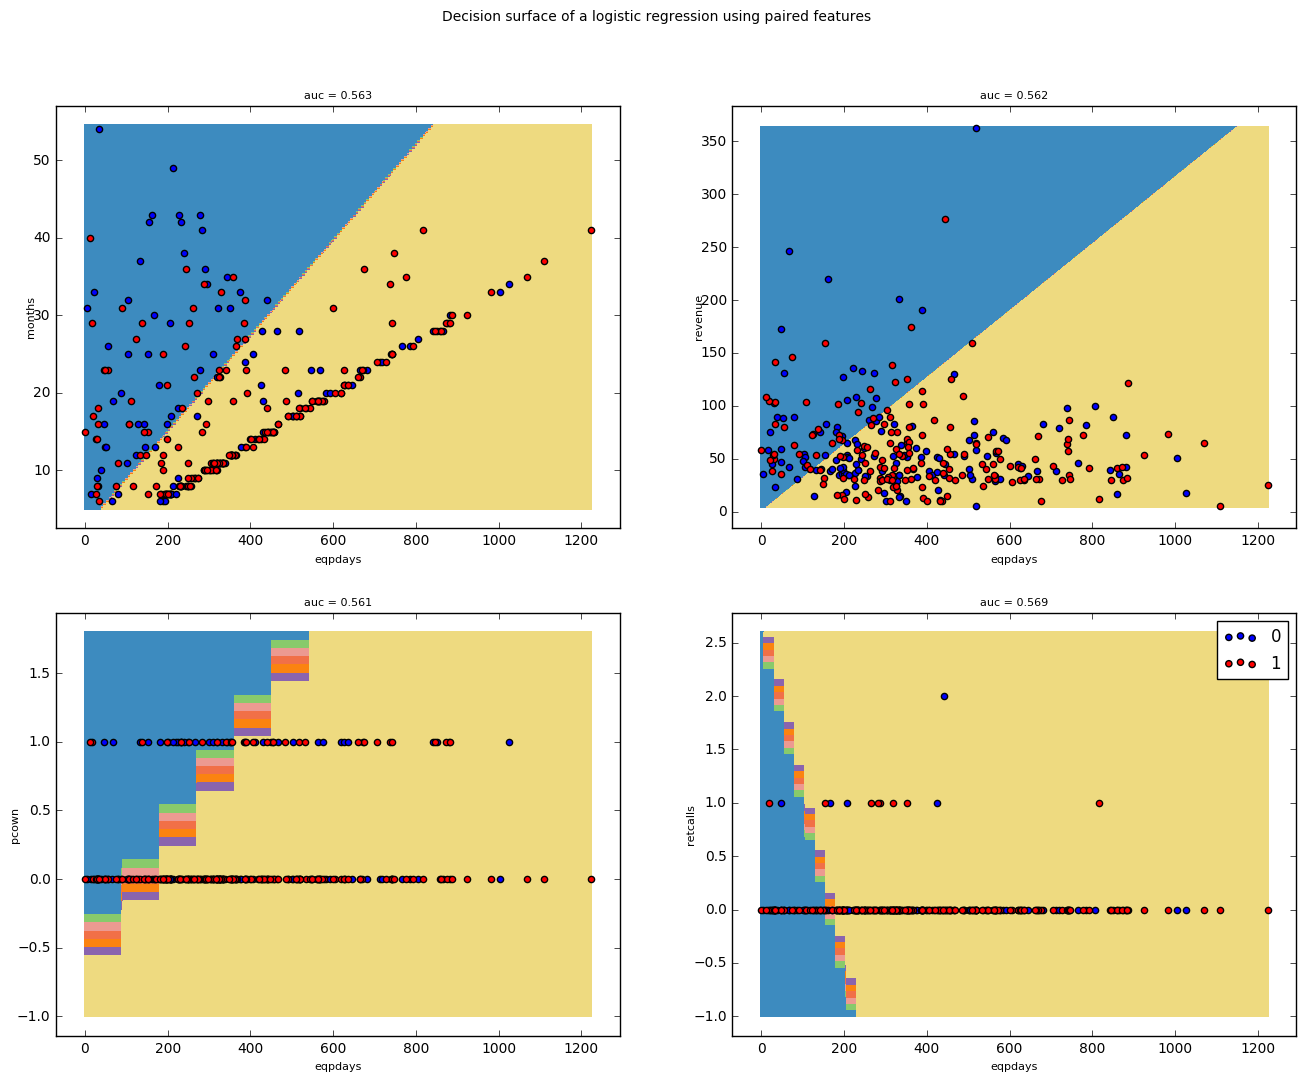

In [45]:

# Look at pairwise plots of decision surface

data_tools.decision_surface_modified(X_train, Y_train, model, variables_list, plot_step = 0.4)



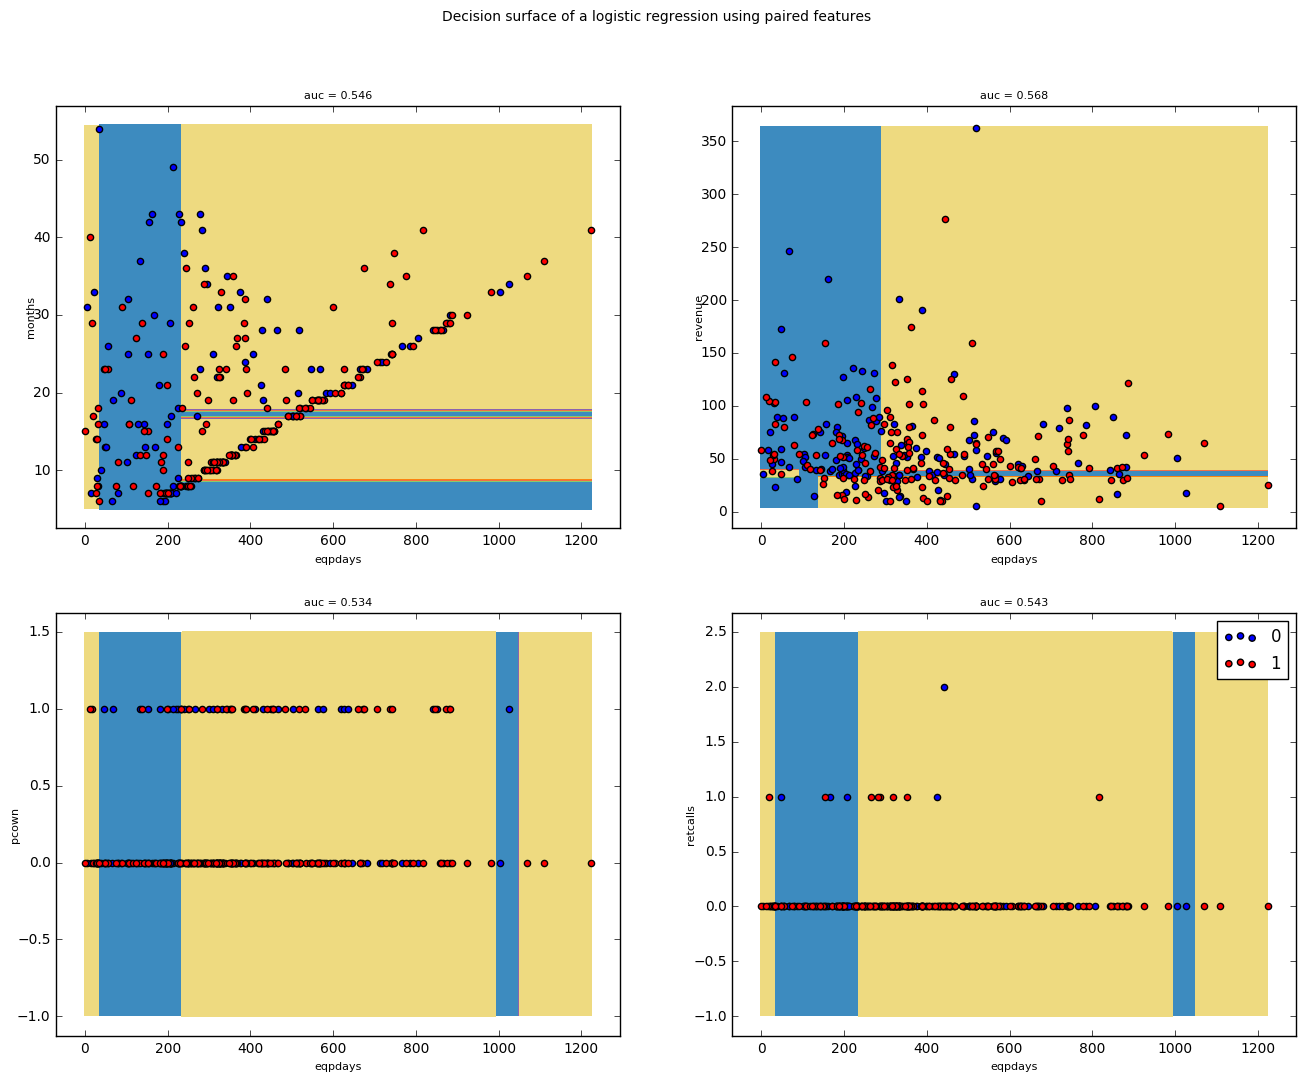

In [46]:
# Model with trees

depth_selected = 3
tree = DecisionTreeClassifier(max_depth=depth_selected)

data_tools.decision_surface_modified(X_train, Y_train, tree, variables_list, plot_step = 0.5)


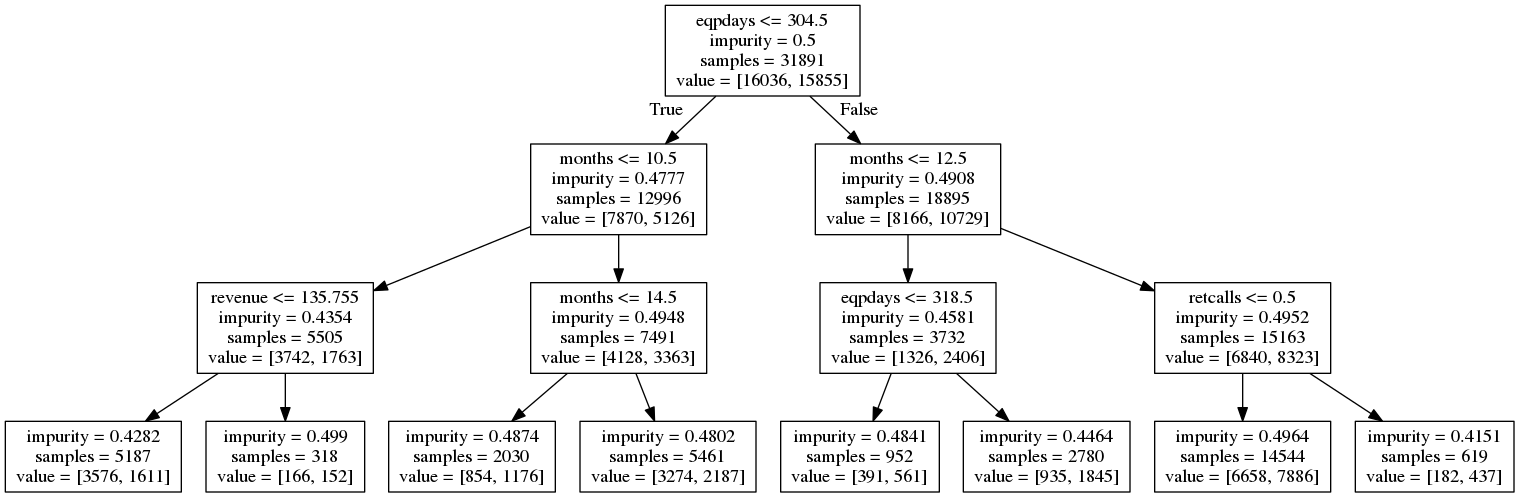

In [47]:
# A function that gives a visual representation of the decision tree
#tree.fit(X_train, Y_train)
tree.fit(X, Y)
data_tools.Decision_Tree_Image(tree, X_train.columns)